# Modeli Regrsionit Linar

Regresioni linear është një metodë statistikore e përdorur për të modeluar marrëdhënien midis një ndryshoreje të varur dhe një ose më shumë variablave të pavarur. Qëllimi është të gjendet një ekuacion linear që mund të parashikojë variablin e varur bazuar në vlerat e variablave të pavarur. 

Në regresionin e thjeshtë linear, kemi një ndryshore të pavarur, ndërsa në regresionin linear të shumëfishtë, përdorim dy ose më shumë ndryshore të pavarura.

                        y=b0​+b1​x
                        
- x - Variabla e varur të cilën ne duam ta parashikojmë.
- y - Variabla e pavarur të cilën ne përdorim për të bere parashikimin.
- b0 - është ndërprerja (intercept), që përfaqëson pikën ku vija kalon boshtin y.
- b1 - është pjerrësia (slope), e cila tregon ndryshimin ne y për çdo njësi rritet në x

**Variabla e varur (Raguse)(Dependent Variable)**: variabli që synojmë të parashikojmë ose shpjegojmë. Në një kontekst biznesi, mund të jetë diçka si shitje, fitim ose kërkesë. Në një kontekst shkencor, mund të jenë rezultate si norma e rritjes ose koha e reagimit. Variabla e varur varet nga variablat e pavarur.

**Variablat e pavarura (Parashikuse)** - Këto janë variablat e përdorur si parashikues në model. Ato ofrojnë hyrjen ose faktorët që ndikojnë në variablin e varur. Në shembullin e parashikimit të çmimeve të shtëpive, variablat e pavarur mund të përfshijnë madhësinë e shtëpisë, numrin e dhomave të gjumit ose vendndodhjen.

**Analiza e Regresionit** - Teknik statistikore e cila shfrytezon th dhenat te observuara per te vene ne relacion variablen e varur me nje ose me teper variabla te pavarura 

**Perdor te dhena te vazhdueshme**


Regresioni linear gjen vijën më të përshtatshme që minimizon diferencën midis vlerave të parashikuara të ndryshores së varur dhe vlerave aktuale, zakonisht duke përdorur një metodë të quajtur katrorët më të vegjël. Kjo linjë mund të përdoret më pas për të bërë parashikime ose për të analizuar forcën dhe drejtimin e marrëdhënieve midis variablave.

In [2]:
import seaborn as sns

# shkarkojme datasetin iris
iris = sns.load_dataset('iris')
iris.head(10)
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [3]:
# per te ndertuar regr e thjeshte linear me duhet
# nje variabel i vazhduar
# variabli x- i cili eshte var i pavarur
# atehere marr gjatesine dh egjeresine  epetales

iris = iris[['petal_length', 'petal_width']]
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   petal_length  150 non-null    float64
 1   petal_width   150 non-null    float64
dtypes: float64(2)
memory usage: 2.5 KB


Text(0.5, 1.0, 'Scatter plot petal_width and petal_length')

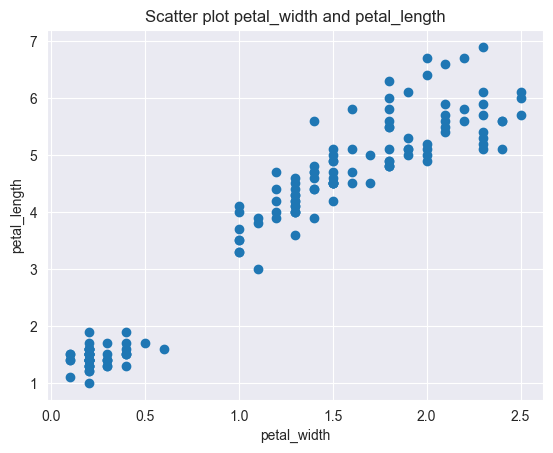

In [4]:
# ndertoj scatter plot per te pare llojin e lidhjes midis dy variable qe zgjodha
# Shfaqja e te dhenave ne forme grafike
import matplotlib.pyplot as plt

x = iris['petal_width']
y = iris['petal_length']
plt.scatter(x, y)
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.title('Scatter plot petal_width and petal_length')

In [5]:
# hapi1: ndaj te dhenat e mia ne test-train pe rte ndertuar modelin dhe per ta provuar ate

x = iris['petal_width']
y = iris['petal_length']
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=19)  # 20& test 80% train

x_test

2      0.2
112    2.1
90     1.2
88     1.3
27     0.2
7      0.2
8      0.2
37     0.1
94     1.3
105    2.1
59     1.4
23     0.5
56     1.6
30     0.2
137    1.8
42     0.2
109    2.5
14     0.2
64     1.3
18     0.3
80     1.1
73     1.2
75     1.4
96     1.3
121    2.0
76     1.4
142    1.9
134    1.4
82     1.2
114    2.4
Name: petal_width, dtype: float64

In [6]:
x_train

24     0.2
119    1.5
72     1.5
106    1.7
89     1.3
      ... 
52     1.5
19     0.3
98     1.1
110    2.0
93     1.0
Name: petal_width, Length: 120, dtype: float64

In [7]:
import numpy as np

x_train = np.array(x_train).reshape(-1, 1)
x_test = np.array(x_test).reshape(-1, 1)

In [8]:
# therrasim modelin e regresit
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

LinearRegression()

In [9]:
# therras funsk predict i cili parashikon ne baze te modelit te mesuar me siper
# se sa do te jene vlerat e y
# do te marrim perseri y_train per te vene ne prove mdoelin tim
y_train_predct = linear_model.predict(x_train)

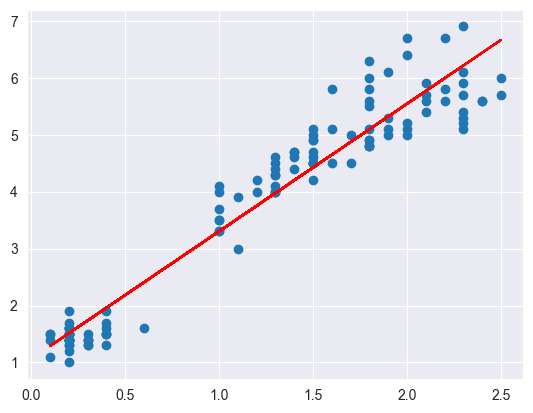

In [10]:
# grafiku i vlerave reale
plt.scatter(x_train, y_train)

# grafiku i vlerave te parashikuara
plt.plot(x_train, y_train_predct, color='red')

In [11]:
# nga grafiku me siper jam e kenaqur me modelin tim
# shoh keofiecentin i cili me tregon en shifra sa i sakte eshte modeli

print('Coefficient:', linear_model.score(x_train, y_train))

Coefficient: 0.9319828454400454


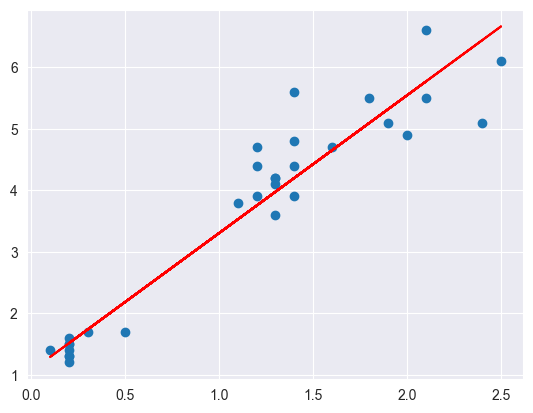

In [12]:
# le te shohim modelin per te dhenat test
y_test_predct = linear_model.predict(x_test)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_predct, color='red')

In [13]:
# shohim keofiecentin per te dhenat test
print('Coefficient:', linear_model.score(x_test, y_test))

Coefficient: 0.9048377085150454


In [14]:
b1 = linear_model.coef_
b0 = linear_model.intercept_
print(b1)
print(b0)

y_pred_test = b0 + b1 * x_test

[2.2394928]
1.0642158249034734


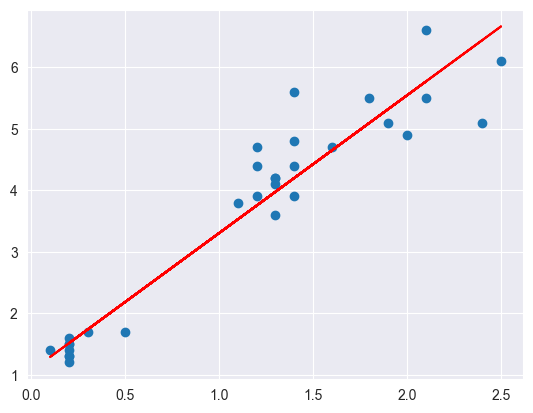

In [15]:
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred_test, color = 'red')    